In [1]:
import json
import matplotlib.pyplot as plt
from glob import glob
import re
from IPython.display import display_pretty, display_html
from IPython.display import HTML
import pandas as pd
import numpy as np
from pprint import pprint



In [18]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
experiment = 'v5-3'
coders = ['carolina','matt']
# coders = ['navid']
data = {coder:{} for coder in coders}
for coder in coders:
    files = '/nfs/home/navid/data/FEC-validation/results/{}/{}*.json'.format(experiment, coder)
    list_files = glob(files)
#     print list_files
    for filename in list_files:
#         print filename
        file_id = re.findall(r'-([0-9]+)\.',filename)[0]
        f = open(filename)
        tmp = json.load(f) 
        data[coder][file_id] = tmp



In [3]:
# data

In [4]:
data['carolina']['1']

{u'comment': u'',
 u'data': {u'final': {u' 10168859 ': [u' MO-68180 ', 1],
   u' 10239648 ': [u' MO-68180 ', 1],
   u' 10344353 ': [u' MO-68180 ', 1],
   u' 10344354 ': [u' MO-68180 ', 1],
   u' 10448676 ': [u' MO-68180 ', 1],
   u' 10694010 ': [u' MO-68180 ', 1],
   u' 10765337 ': [u' MO-68180 ', 1],
   u' 10852513 ': [u' MO-68180 ', 1],
   u' 11124104 ': [u' MO-68180 ', 1],
   u' 11124109 ': [u' MO-68180 ', 1],
   u' 11124111 ': [u' MO-68180 ', 1],
   u' 11124113 ': [u' MO-68180 ', 1],
   u' 11124119 ': [u' MO-68180 ', 1],
   u' 11124122 ': [u' MO-68180 ', 1],
   u' 11124127 ': [u' MO-68180 ', 1],
   u' 11124135 ': [u' MO-68180 ', 1],
   u' 11124142 ': [u' MO-68180 ', 1],
   u' 11124145 ': [u' MO-68180 ', 1],
   u' 11124149 ': [u' MO-68180 ', 1],
   u' 11190956 ': [u' MO-68180 ', 1],
   u' 11813286 ': [u' MO-68180 ', 1],
   u' 11813292 ': [u' MO-68180 ', 1],
   u' 11813294 ': [u' MO-68180 ', 1],
   u' 11813296 ': [u' MO-68180 ', 1],
   u' 11813303 ': [u' MO-68180 ', 1],
   u' 1190486

In [22]:
print experiment
print pageno

v5-3
94


In [11]:
def get_page(pageno):
    '''
    Return the html code of the page.
    '''
    s1 = open('/nfs/home/navid/data/FEC-validation/data/{}/{}.html'.format(experiment,pageno) ).read()
    return s1

def show_page(pageno):
    """
    Display a given page for the data.
    """
    s1 = open('/nfs/home/navid/data/FEC-validation/data/{}/{}.html'.format(experiment,pageno)).read()
    s2 ='<html>\
        <head>\
        <link rel="stylesheet" type="text/css" href="style.css">\
        </head>\
        <body>\
        {0}\
        </body>\
        </html>'.format(s1)

    h = HTML(s2)
    return h

def get_stats(state_initial, state_final):
    """
    Receives to dicts like this:
    {u' 10230295 ': [u' SC-19340 ', 1],
    u' 10314752 ': [u' SC-19340 ', 1],
    u' 12616865 ': [u' SC-19340 ', 1],
    u' 13674235 ': [u' SC-19340 ', 1],
    u' 377534 ': [u' SC-19340 ', 1]}
    and computes the stats
    """
#     print [(int(r_id), x[1], state_final[r_id][1]) for r_id,x in state_initial.iteritems()]
    results = np.array([(x[1], state_final[r_id][1]) for r_id,x in state_initial.iteritems()])
#     print results
#     return
    num_true_negative = sum((results[:,0] == 4 ) * (results[:,1] == 4))
    num_true_positive = sum((results[:,0] == 1 ) * (results[:,1] == 1))

    num_false_negative = sum((results[:,0] == 4 ) * (results[:,1] != 4))
    num_false_positive = sum((results[:,0] < 4  ) * (results[:,1] == 4))

    return num_true_negative ,num_true_positive ,num_false_negative, num_false_positive

# Extract ids 

In [9]:
dict_first_ids = {}
for pageid in range(1,100):
    s = get_page(pageid)
    first_id = re.findall(r"class='id'> ([0-9]+) <",s)[0]
    dict_first_ids[pageid] = first_id

with open('dict_first_ids-{}.json'.format(experiment),'w') as f:
    json.dump(dict_first_ids, f)

IOError: [Errno 2] No such file or directory: '/nfs/home/navid/data/FEC-validation/data/v5-3/96.html'

# Display the data from a given page as seen by coders. (Not interactive)

In [28]:
show_page(68)

# Display the statistics for all 100 pages, for all 3 coders

In [12]:

list_columns = ['True negative','True positive','False negative','False positive', 'Type1 error','Type2 error']
list_type1 = []
list_type2 = []
dict_type1 = {}
dict_type2 = {}
dict_comments = {}
for pageno in range(1,95):
    fileid = str(pageno)
    list_stats = []

#     for coder in coders:
    for coder in ['carolina','matt']:
#     for coder in ['matt']:
        dict_comments[coder] = {fileid:page_data['comment'] for  fileid,page_data in data[coder].iteritems()}
#         dict_records = data[coder][fileid]['data']
        state_initial = data[coder][fileid]['data']['initial']
        state_final = data[coder][fileid]['data']['final']
#         results = np.array([dict_records[record_id][1:] for record_id in sorted(dict_records.keys())])
        # Size of the focal cluster
#         size_focal = np.sum(results[:,0] == 1)
        stats = get_stats(state_initial, state_final)
        
        
        type1= 1.0 * stats[3] / (stats[1] + stats[3])
        type2= 1.0 * stats[2] / (stats[1] + stats[2])
        list_stats.append(get_stats(state_initial, state_final)+(type1, type2))
#     continue
    
    summary =  pd.DataFrame(list_stats,columns=list_columns)
    list_type1.append(summary['Type1 error'].mean())
    list_type2.append(summary['Type2 error'].mean())
    
    dict_type1[fileid] = summary['Type1 error'].mean()
    dict_type2[fileid] = summary['Type2 error'].mean()
    
#     print summary.to_string(header=True, index=False)
#     print "page %d\n" % pageno, "="*90
#     print "\n\n"

type1 = np.array(list_type1)
type2 = np.array(list_type2)

print np.mean(list_type1), np.mean(list_type2)
# print list(enumerate(list_type1))
print list(enumerate(list_type2))

0.00317690051833 0.0933368680878
[(0, 0.011494252873563218), (1, 0.10000000000000001), (2, 0.069264069264069264), (3, 0.17647058823529413), (4, 0.0), (5, 0.0073126386995000132), (6, 0.0), (7, 0.12972027972027972), (8, 0.55000000000000004), (9, 0.0), (10, 0.0), (11, 0.47499999999999998), (12, 0.0), (13, 0.0), (14, 0.07407407407407407), (15, 0.071428571428571425), (16, 0.0), (17, 0.0030864197530864196), (18, 0.9209914320685435), (19, 0.055555555555555552), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.12333333333333332), (24, 0.25), (25, 0.0), (26, 0.013433075933075932), (27, 0.0), (28, 0.018181818181818181), (29, 0.5), (30, 0.0), (31, 0.0), (32, 0.65517241379310343), (33, 0.0), (34, 0.10000000000000001), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0), (40, 0.0), (41, 0.0), (42, 0.0079491255961844191), (43, 0.35294117647058826), (44, 0.0), (45, 0.21428571428571427), (46, 0.0), (47, 0.0028735632183908046), (48, 0.018867924528301886), (49, 0.26190476190476192), (50, 0.0), (51, 0.166666666

In [7]:
list_stats

[(2, 4, 0, 0, 0.0, 0.0), (2, 4, 0, 0, 0.0, 0.0)]

In [26]:

def print_comments(dict_comments):
    style = '.comment{margin-left:2em;margin-bottom:3em;width:50em}'
    html="<html><head><style>{0}</style></head><body>{1}</body></html>"
    s = ''
    html_comment = "<div class='fileid'>{0}</div><div class='comment'>{1}</div>"
    for coder, coder_comments in dict_comments.iteritems():
        for fileid,comment in sorted(coder_comments.items()):
            s += html_comment.format(fileid,comment)
#             print
#             print s
    return HTML(html.format(style,s))
print_comments(dict_comments)

UnicodeEncodeError: 'ascii' codec can't encode character u'\xe9' in position 648: ordinal not in range(128)

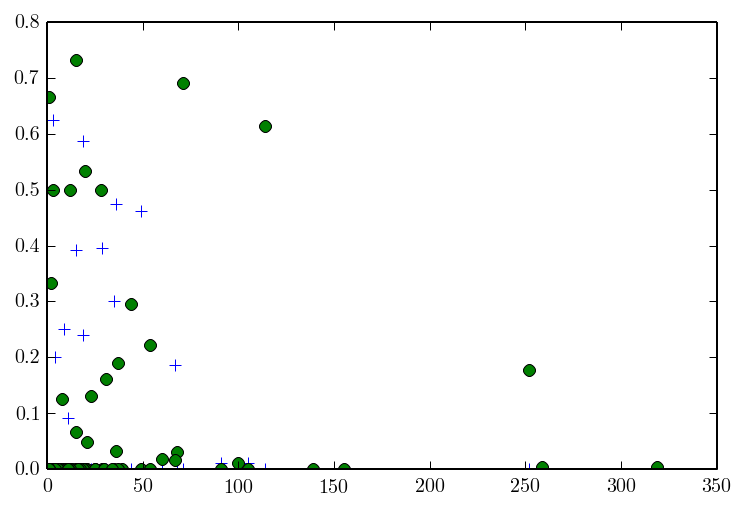

In [77]:
import networks as nt
dict_sizes =  {str(fileid):len([(x,y) for x,y in data['carolina'][str(fileid)]['data']['final'].items() if y[1] == 1]) for fileid in range(1,88)}

sizes_sorted = [dict_sizes[fileid] for fileid in sorted(dict_sizes.keys())]
type1_sorted = [dict_type1[fileid] for fileid in sorted(dict_sizes.keys())]
type2_sorted = [dict_type2[fileid] for fileid in sorted(dict_sizes.keys())]

plt.plot(sizes_sorted,type1_sorted,'+')
plt.plot(sizes_sorted,type2_sorted,'o')

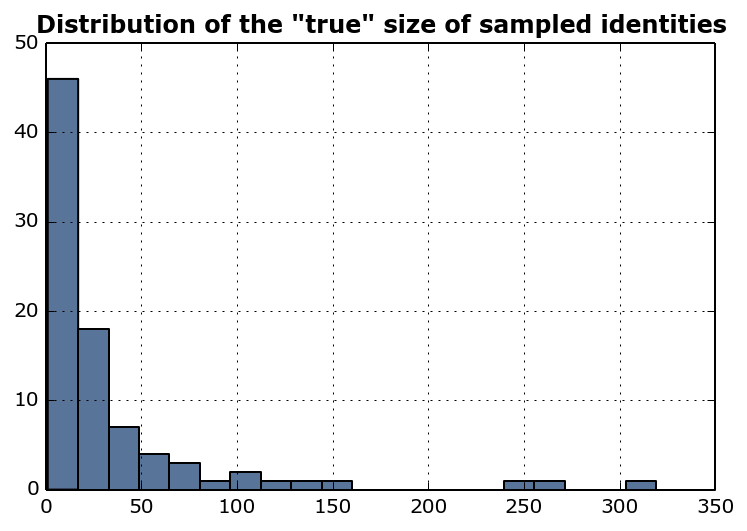

In [67]:
num_yes = [len([(x,y) for x,y in data['carolina'][str(fileid)]['data']['final'].items() if y[1] == 1]) for fileid in range(1,88)]
# [data['carolina'][str(fileid)]['data']['initial'] for fileid in range(1,88)]]
plt.hist(num_yes,20 ,color='#587498')
plt.grid()
plt.title('Distribution of the "true" size of sampled identities', fontdict={'fontweight':'bold'})
plt.savefig('cluster-size-dist.png',dpi=150)

0.0261730414849 0.0247770817699


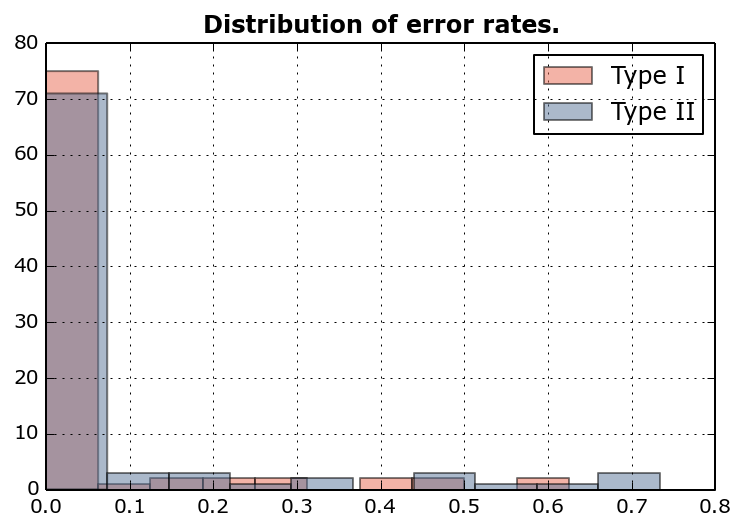

In [68]:
plt.hist(type1, color='#E86850',alpha=0.5, label = 'Type I')
plt.hist(type2, color='#587498',alpha=0.5, label = 'Type II')
print np.mean(type1[type1< 0.4]), np.mean(type2[type2< 0.4])
plt.legend()
plt.grid()
plt.title('Distribution of error rates.', fontdict={'fontweight':'bold'})
plt.savefig('dist-errors.png', dpi=150)

In [53]:

data['carolina']['1']

{u'comment': u'',
 u'data': {u'final': {u' 10230295 ': [u' SC-19340 ', 1],
   u' 10314752 ': [u' SC-19340 ', 1],
   u' 12616865 ': [u' SC-19340 ', 1],
   u' 13674235 ': [u' SC-19340 ', 1],
   u' 377534 ': [u' SC-19340 ', 1]},
  u'initial': {u' 10230295 ': [u' SC-19340 ', 1],
   u' 10314752 ': [u' SC-19340 ', 1],
   u' 12616865 ': [u' SC-19340 ', 1],
   u' 13674235 ': [u' SC-19340 ', 1],
   u' 377534 ': [u' SC-19340 ', 1]}}}

# Export cluster data to file

In [30]:
fulldata = {}
for pageno in range(1,100):
    identities = [(int(r_id),int(result[0]),result[1],result[2]) \
                  for r_id, result in data['carolina'][str(pageno)]['data'].iteritems()]   
    fulldata[int(pageno)] = identities
    print pageno
s = json.dumps(fulldata)
# print s
f = open('set1/resolved_clusters.json','w')
f.write(s)
f.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
